# EDA of Truth Posts

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS

In [5]:
data = pd.read_csv('../data/original_data/truth_scrape.csv')

/Users/rebeccawright/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,8,9,10,11,16,18,19,20,21,22,24,33,34,40,45,46,55,65,68,75,80,81,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Data Cleaning Steps**
* strike all rows where selftext is null
* strike all rows were selftext is [removed]

**Data Column Values**

'all_awardings', 
'allow_live_comments', 
'author',
'author_flair_css_class', 
'author_flair_richtext', 
'author_flair_text',
'author_flair_type', 
'author_fullname', 
'author_patreon_flair',
'author_premium', 
'awarders', 
'can_mod_post', 
'contest_mode',
'created_utc', 
'domain', 
'full_link', 
'gildings', 
'id',
'is_crosspostable', 
'is_meta', 
'is_original_content',
'is_reddit_media_domain', 
'is_robot_indexable', 
'is_self', 
'is_video',
'link_flair_background_color', 
'link_flair_css_class',
'link_flair_richtext', 
'link_flair_template_id', 
'link_flair_text',
'link_flair_text_color', 
'link_flair_type', 
'locked', 
'media_only',
'no_follow', 
'num_comments', 
'num_crossposts', 
'over_18',
'parent_whitelist_status', 
'permalink', 
'pinned', 
'pwls',
'retrieved_on', 
'score', 
'selftext', 
'send_replies', 
'spoiler',
'stickied', 
'subreddit', 
'subreddit_id', 
'subreddit_subscribers',
'subreddit_type', 
'thumbnail', 
'title', 
'total_awards_received',
'treatment_tags', 
'upvote_ratio', 
'url', 
'whitelist_status', 
'wls',
'crosspost_parent', 
'crosspost_parent_list', 
'post_hint', 
'preview',
'removed_by_category', 
'thumbnail_height', 
'thumbnail_width',
'url_overridden_by_dest', 
'media', 'media_embed', 
'secure_media',
'secure_media_embed', 
'author_flair_background_color',
'author_flair_text_color', 
'gallery_data', 'is_gallery',
'media_metadata', 
'author_flair_template_id', 
'banned_by', 
'poll_data',
'edited', 
'author_cakeday', 
'distinguished'

In [3]:
data.dropna(subset=['selftext'], inplace=True)

In [4]:
data = data[data['selftext']!='[removed]']

In [6]:
data.shape

(8899, 90)

In [7]:
missing_values = data.isna().sum()

In [8]:
temp = [missing_values[[i]] for i in range(len(missing_values)) if missing_values.iloc[i] != 0]

In [9]:
df = pd.DataFrame(pd.concat(temp).sort_values())

In [10]:
df.head()

,0
spoiler,15
is_video,645
can_mod_post,733
parent_whitelist_status,957
whitelist_status,960


In [11]:
data['is_original_content'].value_counts(dropna=False)

False    7261
NaN      1638
Name: is_original_content, dtype: int64

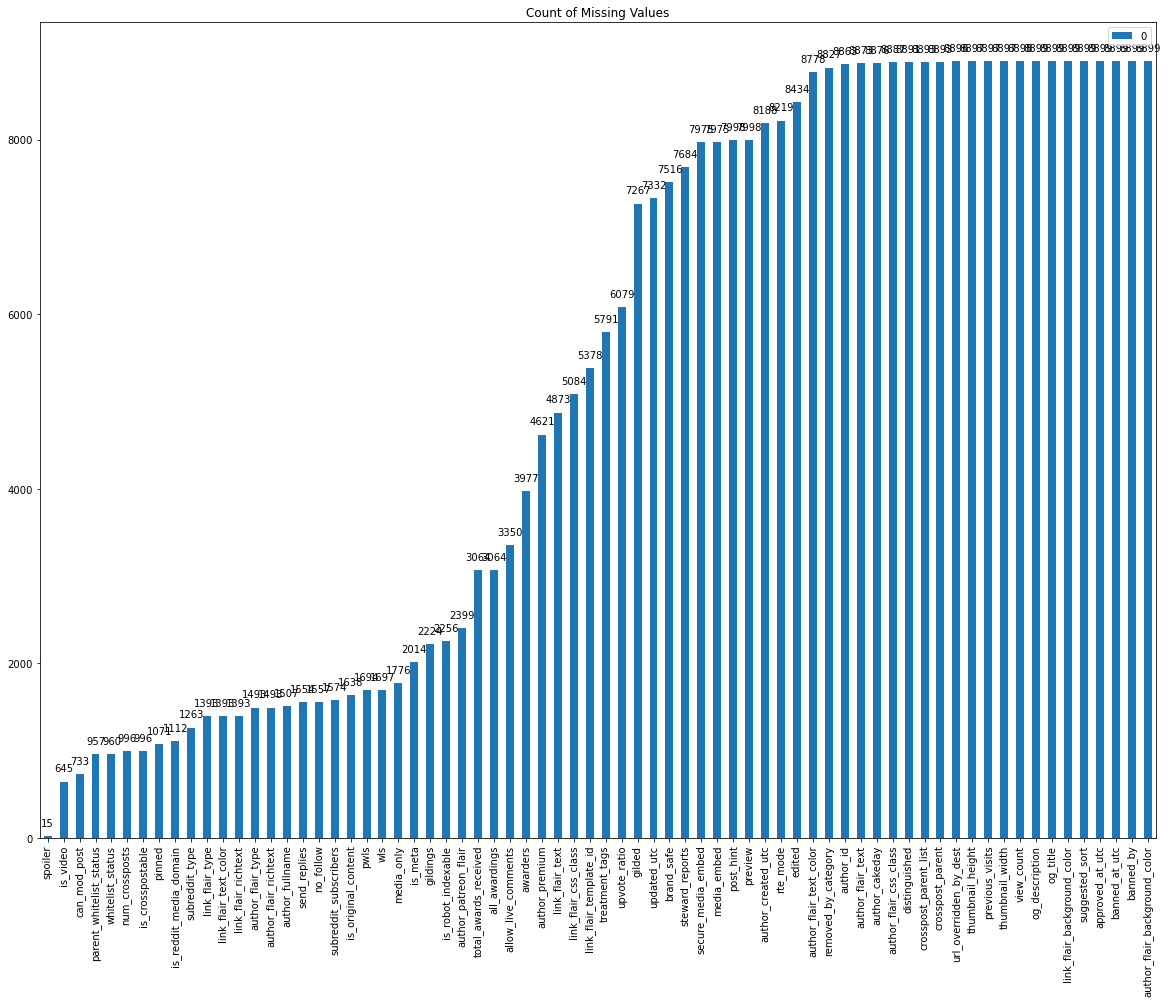

In [12]:
df.plot(kind='bar',figsize=(20,15));
plt.title('Count of Missing Values');

for i in range(df.shape[0]):
    plt.annotate(
        "{:.0f}".format(df[0][i]), # this is the text
        (i, df[0][i]), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

plt.show()

In [6]:
X = data['selftext']
y = data['subreddit']

In [7]:
# function to see top and words given X_vect and vectorizer

def top_words(X, vect):
    temp_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    temp_df.sum().sort_values(ascending=False).head(25).plot(kind='bar')
    
def bottom_words(X, vect):
    temp_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    temp_df.sum().sort_values(ascending=True).head(25).plot(kind='bar')

In [8]:
# consider using :
# #limit features : max_features=500
# ngram range argument : ngram_range=(2,2)

cv = CountVectorizer(stop_words='english', max_features=500)

In [9]:
X

0       Hi! \n\nIm new to reddit. I joined reddit so I...
1       This happened about 8 years ago. I would’ve be...
2       Before I get into detail of all of the **main,...
3       I started having this feeling a week ago in my...
5       I was wondering if someone had a similar exper...
                              ...                        
9982    It's a short thing my mother-in-law (dad's gir...
9983    This is an updated edit of my post from three ...
9984    To keep this short, i was probably 10 or 11 wh...
9988    NOTE: This is my First Post\n\t\nEver since I ...
9989    I was running late for school, so I was rushin...
Name: selftext, Length: 8899, dtype: object

In [10]:
cv.fit_transform(X,y)

<8899x500 sparse matrix of type '<class 'numpy.int64'>'
	with 452721 stored elements in Compressed Sparse Row format>

In [11]:
#make it a dataframe
X_vect = cv.fit_transform(X,y)
cv_df = pd.DataFrame(X_vect.toarray(), columns = cv.get_feature_names())

In [12]:
cv_df.head()

,10,11,12,15,20,30,50,60,able,absolutely,...,wouldn,wrong,www,x200b,year,years,yes,young,younger,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,3,0,0,1,0
2,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,1,5,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


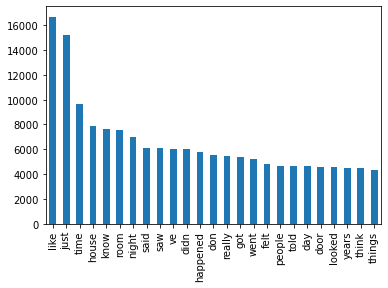

In [13]:
top_words(X_vect,cv)

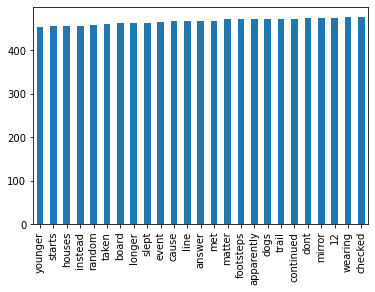

In [14]:
bottom_words(X_vect,cv)

In [16]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

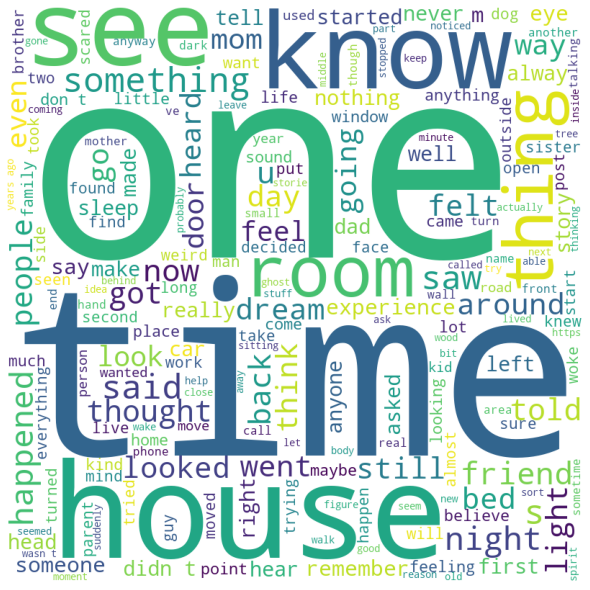

In [15]:
# source code: https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = '' 
  
for entry in X: 
      
    # typecaste each val to string 
    entry = str(entry) 
  
    # split the value 
    words = entry.split() 
      
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
      
    comment_words += " ".join(words)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [62]:
tf = TfidfVectorizer(stop_words='english', max_features=500, token_pattern = '[a-z]\w+')

In [63]:
tf.fit_transform(X,y)

<880x500 sparse matrix of type '<class 'numpy.float64'>'
	with 16035 stored elements in Compressed Sparse Row format>

In [64]:
#make it a dataframe
X_vec = tf.fit_transform(X,y)
tf_df = pd.DataFrame(X_vec.toarray(), columns = tf.get_feature_names())

In [65]:
tf_df.head()

,able,absolutely,actors,actual,actually,adam,adopted,ago,alive,alternate,...,write,writers,writing,wrong,www,x200b,yeah,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


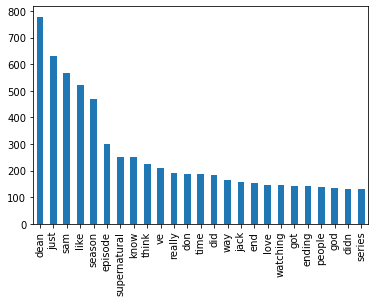

In [67]:
top_words(X_vect,cv)

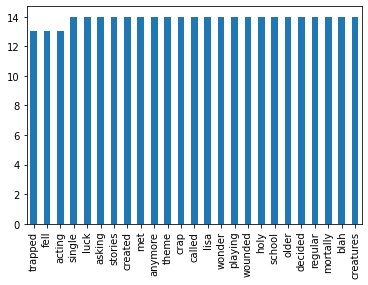

In [68]:
bottom_words(X_vect,cv)